In [1]:
# Local install for testing
# pip install -e .
# Install from git
# pip install git+https://github.com/RuiGao9/met_gfit.git
import numpy as np
from met_gfit import gfit, rmse 

In [2]:
obs = [1, 2, np.nan, 
       4, 5, 5.5, 
       4.8, 6.1, 5.0, 
       3.3, 1.7, 2.5] 
sim = [1.1, 1.9, 6,
       3.8, 5.1, 5.4,
       np.nan, 6.0, 5.2,
       np.nan, 1.5, 2.7]

if hasattr(gfit, '__version__'):
    print(f"Testing met-gfit version: {gfit.__version__}")

val = rmse(obs, sim) 
all_stats = gfit(obs, sim, plots='No', show_results='No')

c:\tools\Anaconda\envs\met-gfit\Lib\site-packages\met_gfit\metrics.py:177: UserWarning: 
[met-gfit Warning]: 3 invalid points (NaN/Inf) were detected and removed. Analysis proceeding with n = 9 (Original n = 12).
  warnings.warn(warning_msg, UserWarning)


c:\tools\Anaconda\envs\met-gfit\Lib\site-packages\met_gfit\metrics.py:177: UserWarning: 
[met-gfit Warning]: 15 invalid points (NaN/Inf) were detected and removed. Analysis proceeding with n = 985 (Original n = 1000).
  warnings.warn(warning_msg, UserWarning)


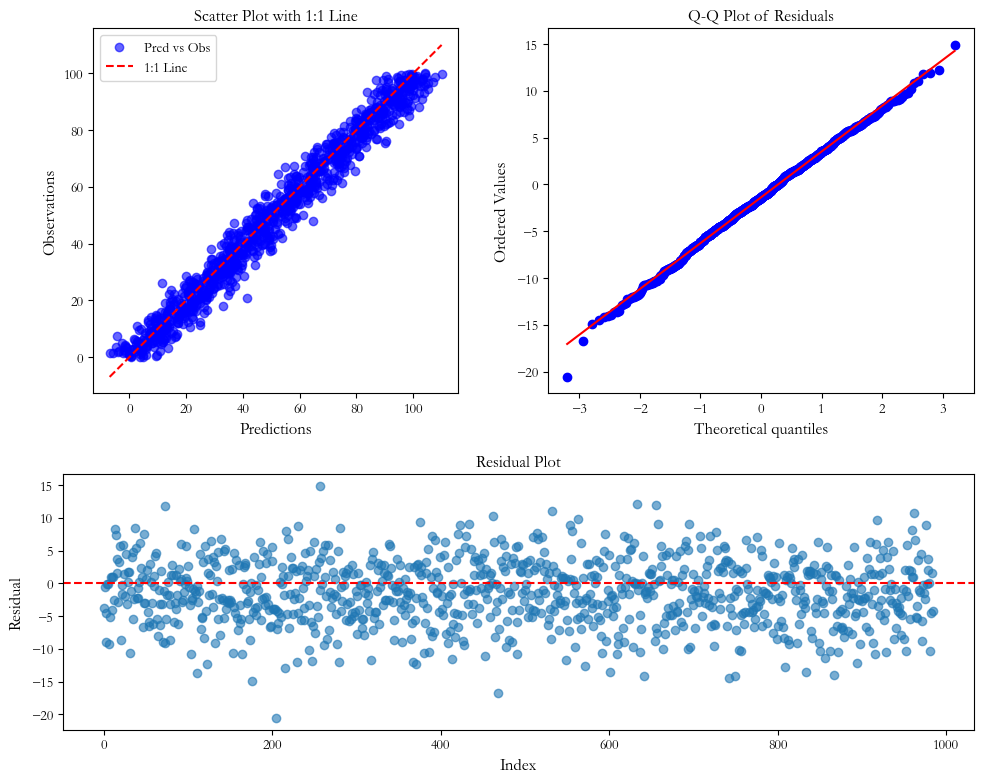


      MODEL EVALUATION REPORT
Data Cleaning: 15 rows removed (NaN/Inf)
Number of cases (n): 985
----------------------------------------
MSE:            25.8708
RMSE:           5.0863
RRMSE:          10.1418
Bias:           -1.3888
MAE:            4.0504
Standard R2:    0.9691
Simple R2:      0.9725
Pearson r:      0.9861 (p=0.00e+00)
Willmott's d:   0.9924
RSD:            4.8930



In [3]:
# With more data points and some noise
np.random.seed(42)
# Create a larger dataset with 1000 samples
obs = np.linspace(0, 100, 1000)
noise = np.random.normal(0, 5, 1000)
bias = 1.3                          
sim = obs + noise + bias
# Add some NaN and Inf values randomly
nan_indices = np.random.choice(range(1000), 10, replace=False)
obs[nan_indices] = np.nan
# Add some Inf values randomly
inf_indices = np.random.choice(range(1000), 5, replace=False)
sim[inf_indices] = np.inf

# Showing the results
results = gfit(obs, sim, num_decimal=4)